In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv(r'C:\Users\s1un\Desktop\steam_dataset\a_steam_data_2021_2025.csv')
# Visualizza le prime righe del dataset
df.head()

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues


In [84]:
# Visualizza le dimensioni del dataset: in questo caso presenta 65.521 righe e 10 colonne
df.shape

(65521, 10)

In [85]:
# Visualizza la struttura del dataset, controlla i tipi di dati e verifica la presenza di valori NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65521 entries, 0 to 65520
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            65521 non-null  int64  
 1   name             65521 non-null  object 
 2   release_year     65521 non-null  int64  
 3   release_date     65521 non-null  object 
 4   genres           65455 non-null  object 
 5   categories       65514 non-null  object 
 6   price            65521 non-null  float64
 7   recommendations  65521 non-null  int64  
 8   developer        65468 non-null  object 
 9   publisher        65338 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 5.0+ MB


In [98]:
# Visualizza la panoramica statistica
df.describe()

,appid,release_year,price,recommendations
count,6.552100e+04,65521.000000,65521.000000,65521.000000
mean,2.580607e+06,2023.453091,7.204043,362.165336
std,7.692480e+05,1.386641,16.914429,6936.837198
min,1.200220e+06,2021.000000,0.000000,0.000000
25%,1.916970e+06,2022.000000,0.990000,0.000000
50%,2.516050e+06,2024.000000,3.990000,0.000000
75%,3.193800e+06,2025.000000,9.740000,0.000000
max,4.243930e+06,2025.000000,1900.000000,862487.000000


In [100]:
# Individua i giochi con prezzo superiore a 500 
outliers_prezzo = df_clean[df_clean['price'] > 500]
print(outliers_prezzo[['name', 'price', 'developer']])

# Individua i giochi con maggior numero di raccomandazioni 
outliers_popolarità = df_clean[df_clean['recommendations'] > 500000]
print(outliers_popolarità[['name', 'recommendations']])

                                     name    price            developer
16130                           Zekertune   615.38           Zekertopia
33591  The Leverage Game Business Edition   999.98             A&S Inc.
34838                   The Leverage Game   999.98             A&S Inc.
62600                       MolCollabo v2  1900.00  FiatLux Corporatoin
                     name  recommendations
12832          ELDEN RING           793463
15892  Black Myth: Wukong           862487


MolCollabo v2 e è il gioco che presenta il prezzo più alto. Non si tratta di un errore in quanto è un software professionale. I giochi invece con raccomandazioni superiori a 500.000 sono Elden Ring e Black Myth Wukong. 

In [88]:
# Individua valori mancanti 
df.isnull().sum()

appid                0
name                 0
release_year         0
release_date         0
genres              66
categories           7
price                0
recommendations      0
developer           53
publisher          183
dtype: int64

Nel dataset sono presenti alcuni giochi privi di genere e categorie. Inoltre, per una parte dei titoli risultano assenti le informazioni riguardanti lo sviluppatore e il publisher

In [101]:
# Sostituisce i valori mancanti con la stringa Unknown
df['genres'].fillna('Unknown', inplace=True)
df['categories'].fillna('Unknown', inplace=True)
df['developer'].fillna('Unknown', inplace=True)
df['publisher'].fillna('Unknown', inplace=True)

In [102]:
# Verifica se la sostituzione è avvenuta con successo
print(df.isnull().sum())

appid              0
name               0
release_year       0
release_date       0
genres             0
categories         0
price              0
recommendations    0
developer          0
publisher          0
dtype: int64


In [103]:
# Utilizzo della funzione groupby per capire se esiste una correlazione tra costo del gioco e raccomandazioni
analisi_prezzi = df_clean.groupby('price')['recommendations'].mean().sort_values(ascending=False)
print(analisi_prezzi.head())

price
38.49    180783.000000
15.83     67153.000000
22.49     57257.666667
33.32     35998.000000
19.79     23154.833333
Name: recommendations, dtype: float64


I giochi con raccomandazioni più elevate hanno un prezzo che rientra nella fascia alta: questo significa che i titoli che coinvolgono maggiormente la community sono spesso quelli non gratuiti e che rientrano nella fascia di costo medio-alta (come riscontrato con Eldering Ring e Black Myth Wukong)

In [104]:
# Utilizzo della funzione groupby per raggruppare i giochi in base all'anno di rilascio
games_per_year = df.groupby('release_year').size()
games_per_year

release_year
2021     8383
2022     9617
2023    11557
2024    15858
2025    20106
dtype: int64

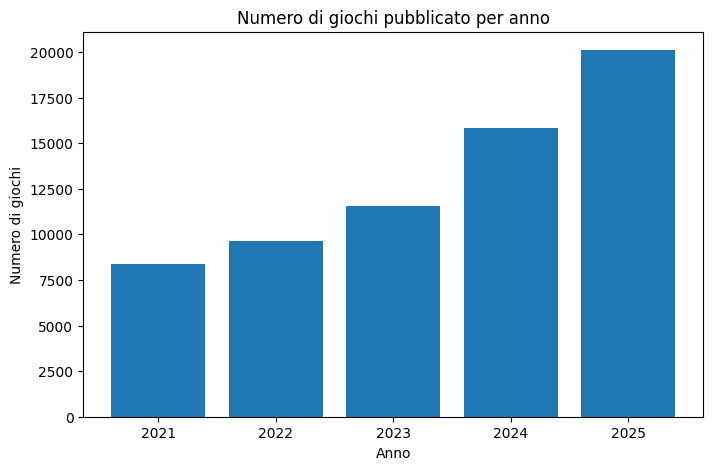

In [31]:
# Crea un grafico a barre che mostra il numero di giochi pubblicati su Steam per anno
plt.figure(figsize=(8,5))
plt.bar(games_per_year.index, games_per_year.values) 
plt.title("Numero di giochi pubblicato per anno")
plt.xlabel("Anno")
plt.ylabel("Numero di giochi")
plt.show()

Il grafico evidenzia un trend di crescita costante, con un incremento che si registra nel biennio 2024-2025.

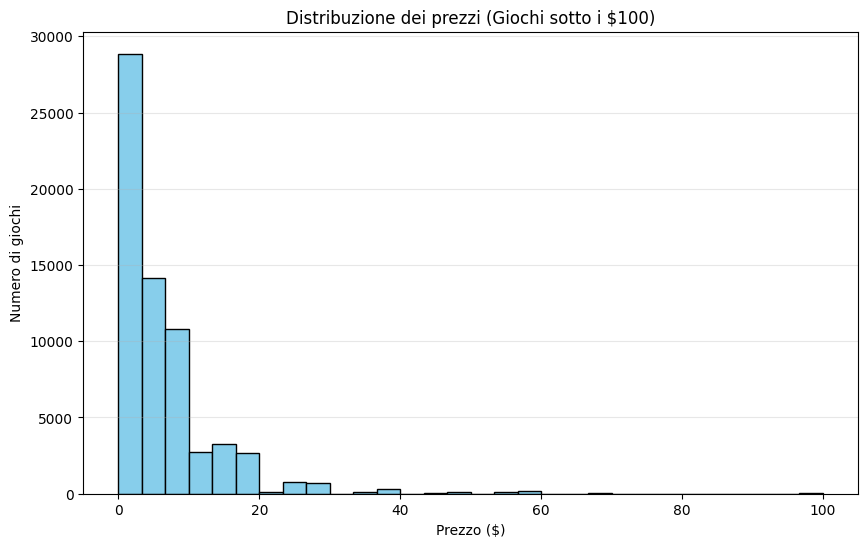

In [105]:
# Crea un grafico di tipo istogramma che mostra i giochi con prezzo sotto i 100$
plt.figure(figsize=(10, 6))
# Viene applicato un filtro per escludere gli outlier, migliorando la leggibilità del grafico
plt.hist(df_clean[df_clean['price'] < 100]['price'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribuzione dei prezzi (Giochi sotto i $100)')
plt.xlabel('Prezzo ($)')
plt.ylabel('Numero di giochi')
plt.grid(axis='y', alpha=0.3)
plt.show()

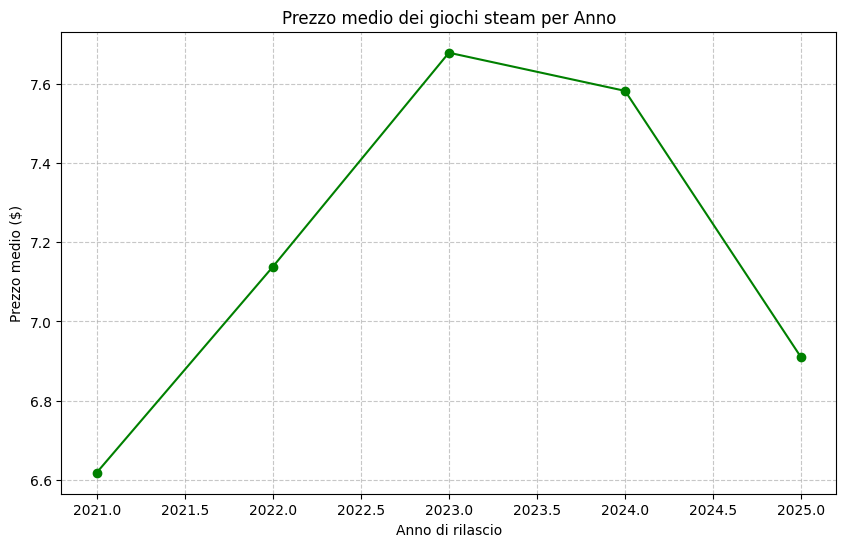

In [106]:
# Utilizzo della funzione group by per raggruppare i giochi per anno di rilascio. Successivamente viene calcolata la media della colonna prezzo 
avg_price_per_year = df.groupby('release_year')['price'].mean()

# Crea un grafico di tipo line plot che mostra l'andamento medio dei giochi per anno di rilascio
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', color='green', linestyle='-')
plt.title('Prezzo medio dei giochi steam per Anno')
plt.xlabel('Anno di rilascio')
plt.ylabel('Prezzo medio ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Nel 2023 c'è stato un picco dei prezzi, dopodichè il prezzo medio è sceso drasticamente. Questo suggerisce che molto probabilmente c'è stato un aumento di titoli low-cost dal 2024 al 2025.

In [107]:
# La stringa dei generi viene divisa. Se un gioco ha tre generi, nel nuovo dataframe il gioco appare in tre righe diverse
df_exploded = df.assign(genres=df['genres'].str.split(';')).explode('genres')

# Conta quanti giochi di un certo tipo di genere sono usciti ogni anno
genre_popularity = df_exploded.groupby(['release_year', 'genres']).size().reset_index(name='count')

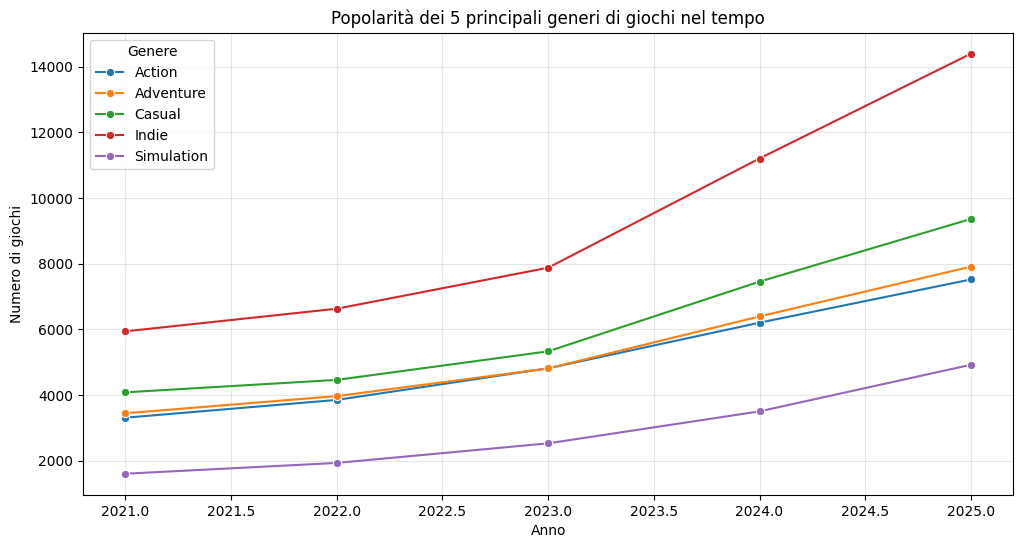

In [108]:
# Identifica i top 5 generi
top_genres = df_exploded['genres'].value_counts().nlargest(5).index

# Filtra i dati solo per i generi selezionati
df_top_genres = genre_popularity[genre_popularity['genres'].isin(top_genres)]

# Crea un grafico di tipo multi-line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_genres, x='release_year', y='count', hue='genres', marker='o')
plt.title('Popolarità dei 5 principali generi di giochi nel tempo')
plt.xlabel('Anno')
plt.ylabel('Numero di giochi')
plt.legend(title='Genere')
plt.grid(True, alpha=0.3)
plt.show()

Il genere indie è quello che mostra la crescità più rapida rispetto agli altri generi. Action, Adventure e Casual invece mostrano una crescita costante. Il genere Simulation è quello che mostra una crescita minore rispetto agli altri generi.

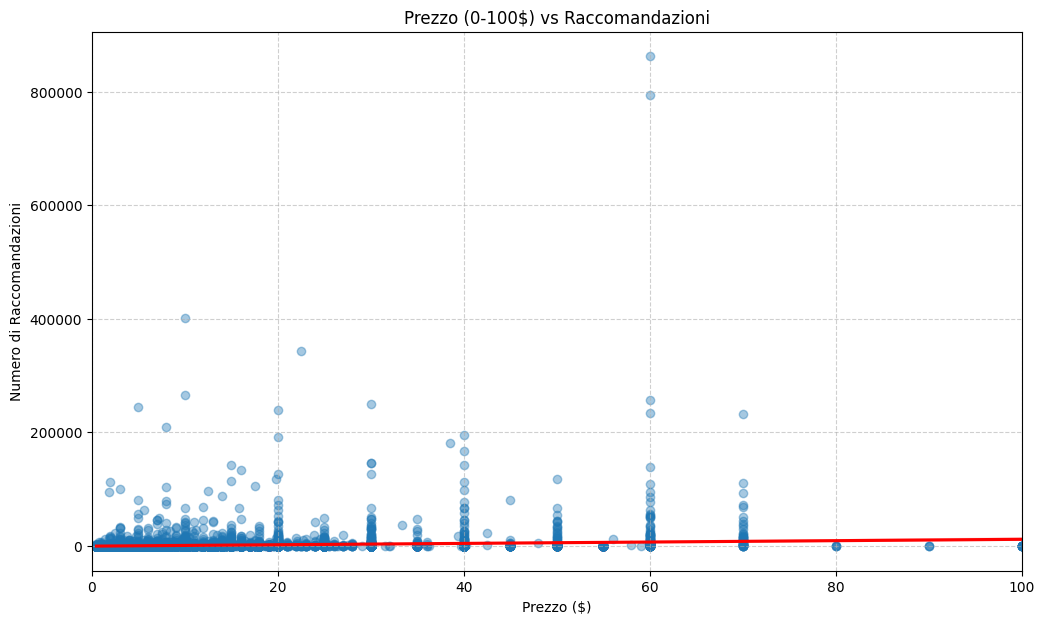

In [95]:
# Elimina gli outlier con prezzo elevato
plt.figure(figsize=(12, 7))
# Aggiunge al grafico una linea di tendenza
sns.regplot(data=df_zoom, x='price', y='recommendations', 
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})

plt.title('Prezzo (0-100$) vs Raccomandazioni')
plt.xlabel('Prezzo ($)')
plt.ylabel('Numero di Raccomandazioni')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 100)
plt.show()

La linea di tendenza si presenta quasi piatta, questo indica probabilmente che non esiste una correlazione significativa tra il prezzo e il numero di raccomandazioni. In altre parole, un prezzo più alto non garantisce più raccomandazioni. Sono presenti titoli con un eccezionale successo (es. a 60$ con 800.000 raccomandazioni), ma non rappresentano l'andamento generale.

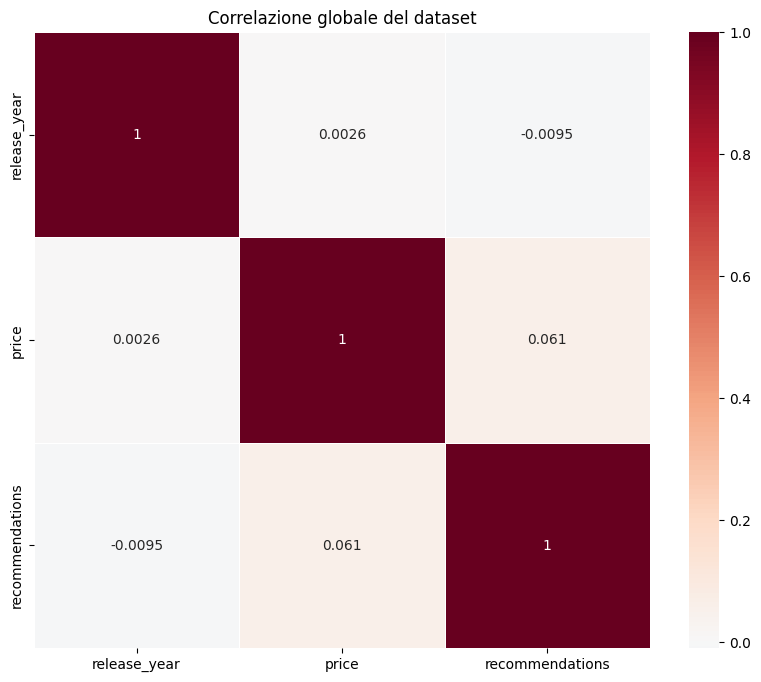

In [96]:
# Seleziona tutte le colonne numeriche
cols_to_corr = ['release_year', 'price', 'recommendations']

# Crea una matrice di correlazione
plt.figure(figsize=(10, 8))
full_corr = df_clean[cols_to_corr].corr()

# Crea la heatmap
sns.heatmap(full_corr, annot=True, cmap='RdBu_r', center=0, square=True, linewidths=.5)
plt.title('Correlazione globale del dataset')
plt.show()

Il grafico mostra che il prezzo non è un fattore determinante per il numero di raccomandazioni di un gioco. Un titolo gratuito può ottenere lo stesso successo di un gioco costoso (ad esempio a 60$). Non emerge quindi alcuna tendenza che indichi un aumento dei prezzi dei giochi nel tempo. L’anno di rilascio inoltre non garantisce raccomandazioni: ci si potrebbe aspettare una correlazione negativa, pensando che i giochi più vecchi abbiano avuto più tempo per accumulare voti, ma i dati mostrano che i giochi nuovi scalano le classifiche, annullando quindi questo vantaggio temporale.


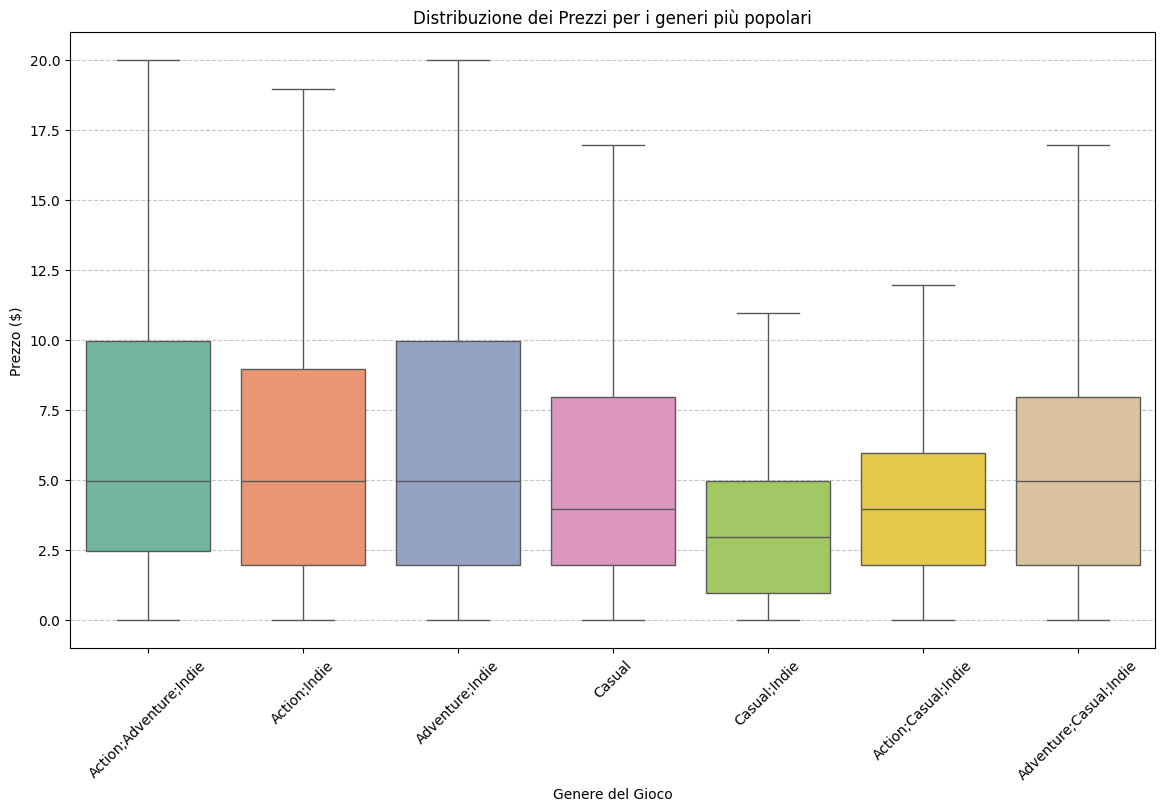

In [109]:
# Identifica i generi più frequenti nel dataset, generando un boxplot per visualizzare come varia il prezzo tra diverse categorie
top_genres = df_clean['genres'].value_counts().nlargest(7).index
df_top = df_clean[df_clean['genres'].isin(top_genres)]
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_top, 
    x='genres', 
    y='price', 
    hue='genres', 
    palette='Set2', 
    showfliers=False, 
    legend=False
)
plt.title('Distribuzione dei Prezzi per i generi più popolari')
plt.xlabel('Genere del Gioco')
plt.ylabel('Prezzo ($)')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()